In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset

dataset = pd.read_csv("train.csv")
dataset.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [3]:
# Clean dataset

cleanset = dataset.dropna()  # drop NaN
cleanset = cleanset[cleanset.Expected < 75]  # discard readings above 75 mm/hr
cleanset.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
10,2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,0.995000,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
11,2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,0.995000,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
12,2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,0.995000,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016


In [4]:
# Group data for EDA

groupset = cleanset.groupby('Id')
groupedset = groupset.aggregate(np.mean)
groupedset.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,,,
2,30.444444,2,14.388889,12.166667,15.555556,19.222222,20.833333,18.666667,21.388889,24.444444,0.997963,0.994630,0.998333,0.999074,0.423611,0.166667,0.451389,0.798611,-0.234450,-1.448893,-0.312227,1.058884,1.016000
10,27.333333,10,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,0.835833,0.945833,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000
11,29.428571,12,19.285714,17.357143,19.928571,23.071429,19.285714,17.357143,19.928571,23.071429,0.985476,0.968333,0.991190,1.011667,0.482143,-0.428571,0.196429,0.964286,-1.450004,-2.458572,-0.150003,2.465709,2.540001
12,30.600000,6,32.850000,32.000000,34.200000,36.950000,40.800000,37.750000,40.150000,43.100000,0.992333,0.983000,0.993667,0.998000,1.162500,0.687500,1.043750,1.531250,0.067993,-1.230002,-0.036003,1.763994,3.302002
14,12.666667,14,18.333333,14.166667,17.500000,21.000000,18.333333,14.166667,17.500000,21.000000,1.013889,0.973889,0.998333,1.033889,0.750000,-1.208333,0.395833,1.750000,-1.963338,-4.266668,0.113327,5.033330,1.270001


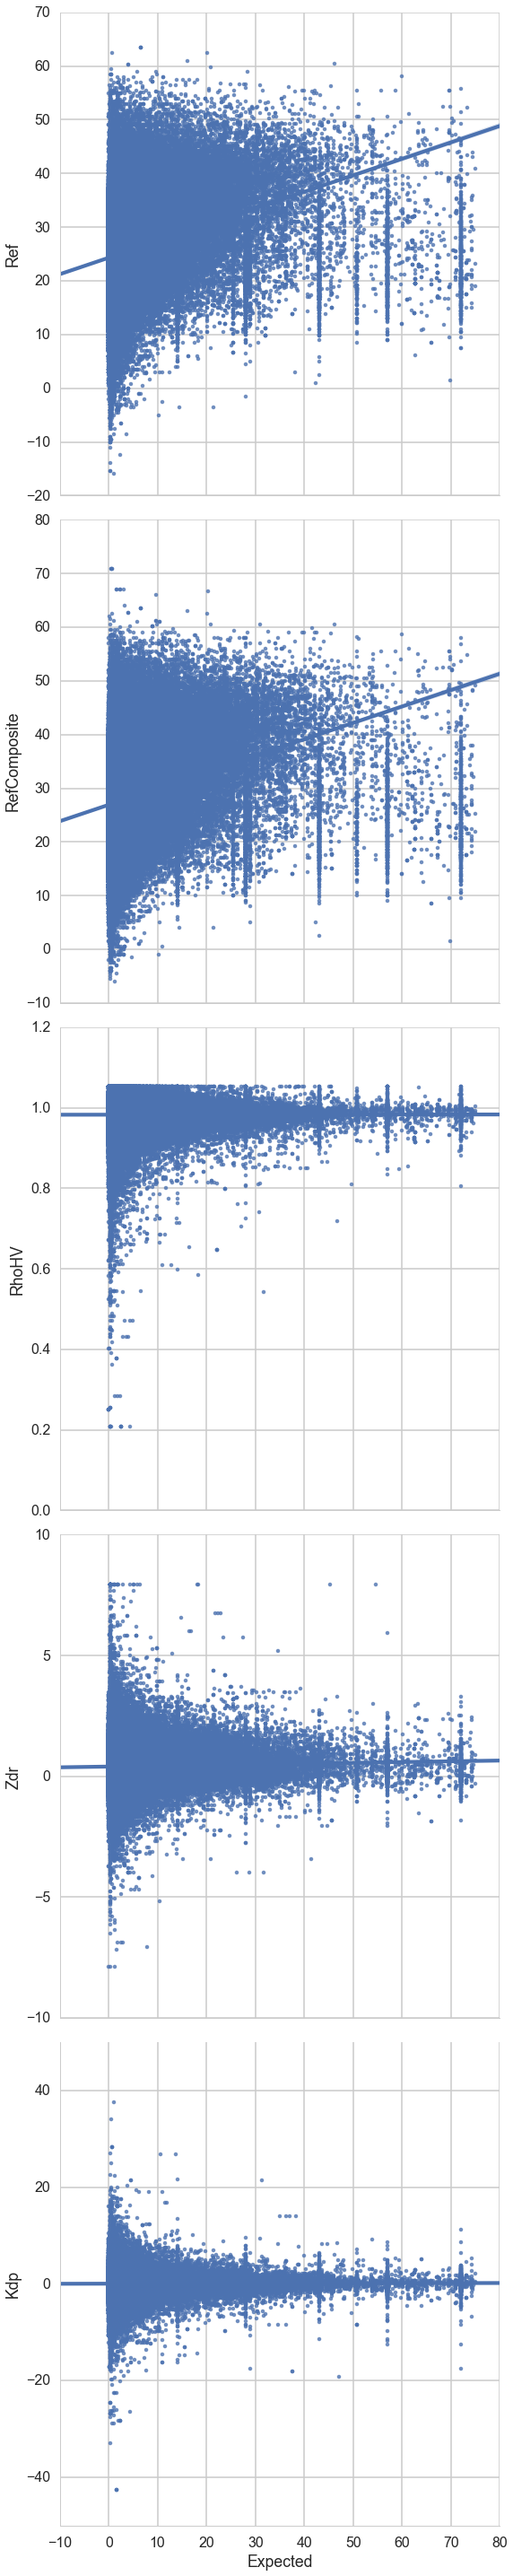

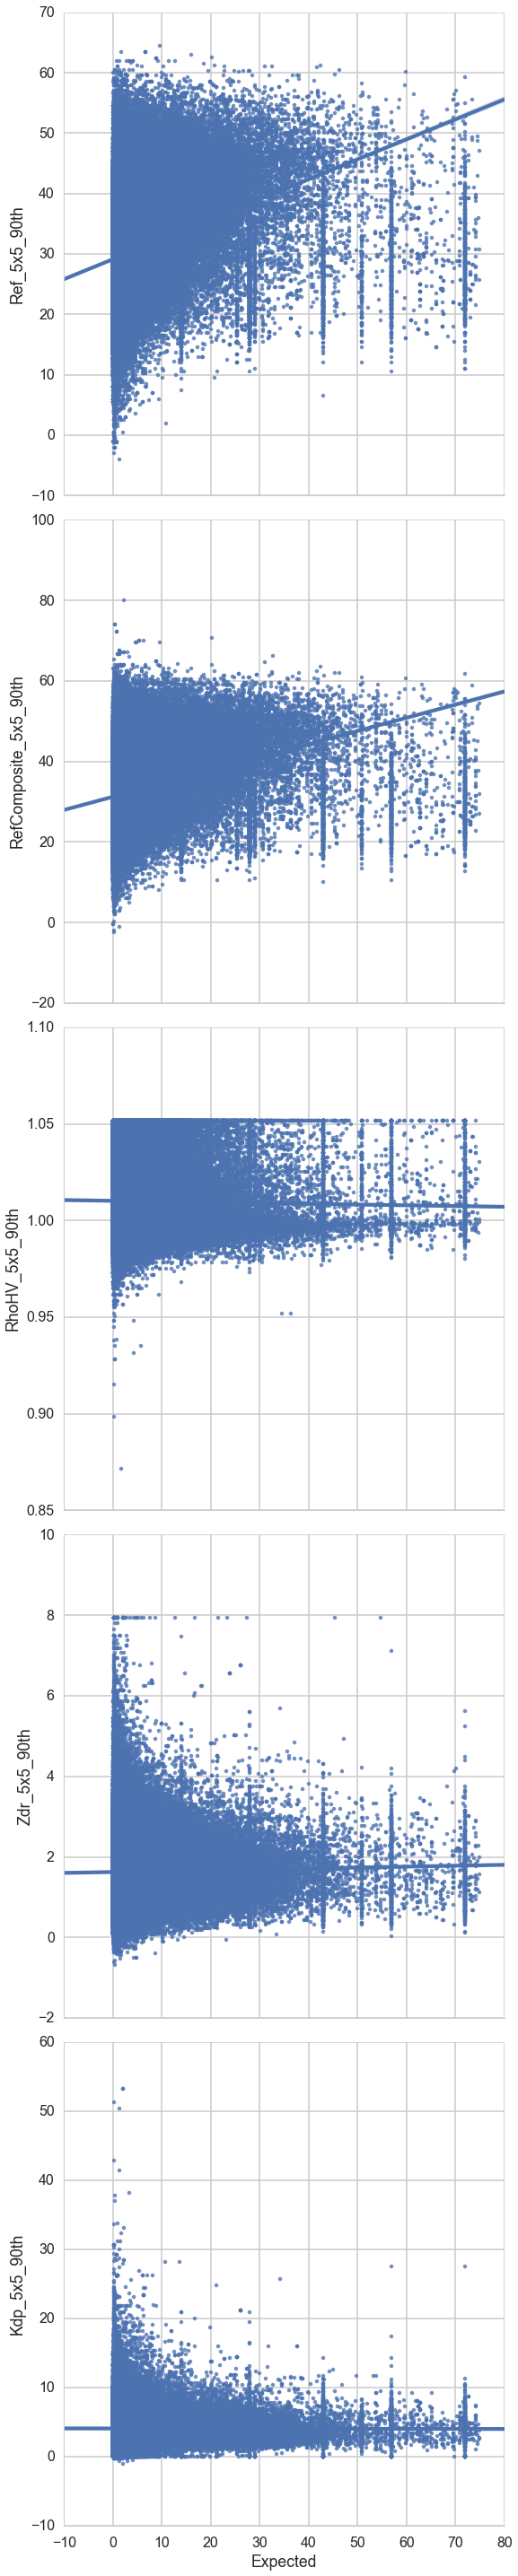

In [5]:
# Exploratory Data Analysis

sns.pairplot(groupedset, kind='reg', x_vars=['Expected'], y_vars=['Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp'], size=8)
sns.pairplot(groupedset, kind='reg', x_vars=['Expected'], y_vars=['Ref_5x5_90th', 'RefComposite_5x5_90th', 'RhoHV_5x5_90th', 'Zdr_5x5_90th', 'Kdp_5x5_90th'], size=8)

### Ideas:
- RefComposite: time rising, time falling as part of one hour
- Logging Zdr, Kdp (90th)

In [6]:
groupedset['logKdp90'] = np.log(np.abs(groupedset.Kdp_5x5_90th))
groupedset['logExpected'] = np.log(groupedset.Expected)

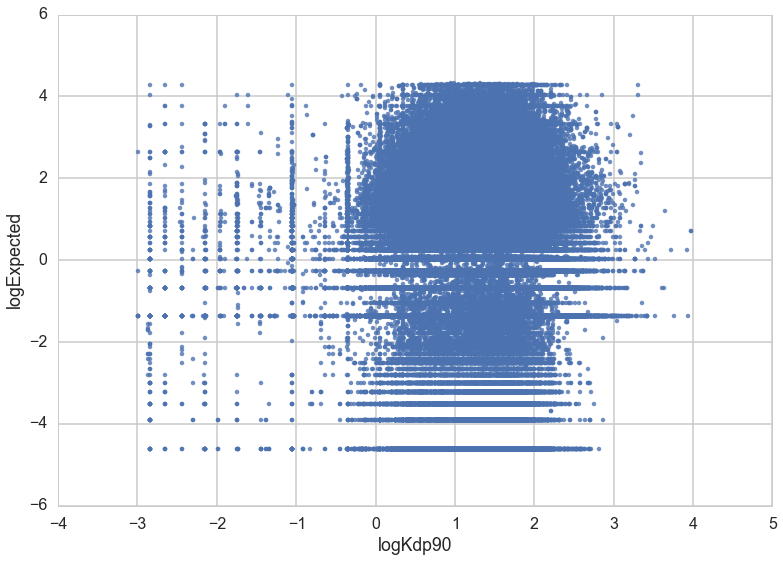

In [7]:
sns.regplot('logKdp90', 'logExpected', data=groupedset)

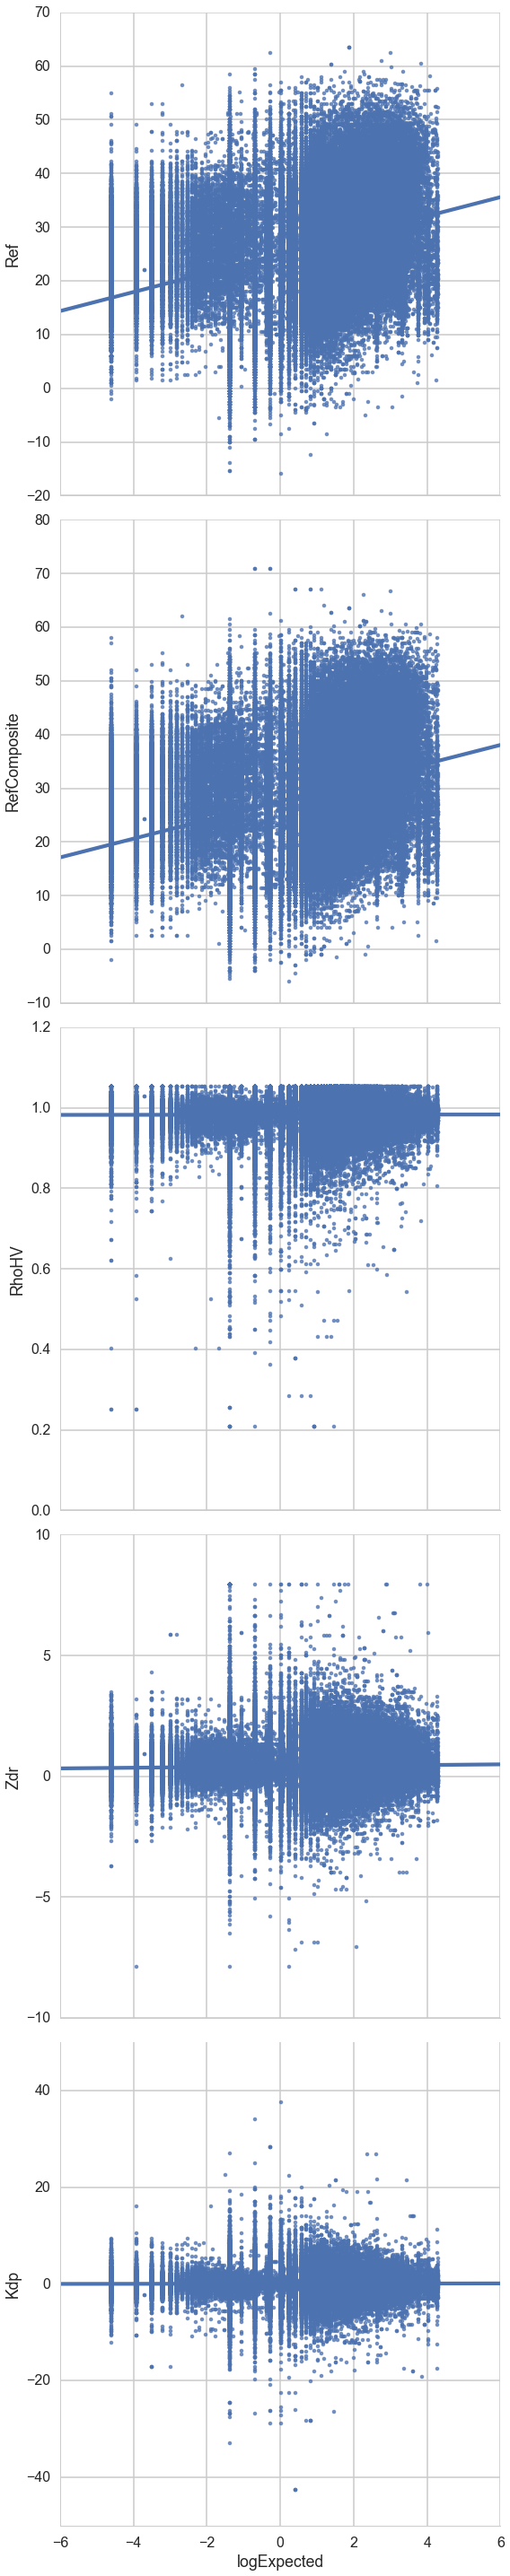

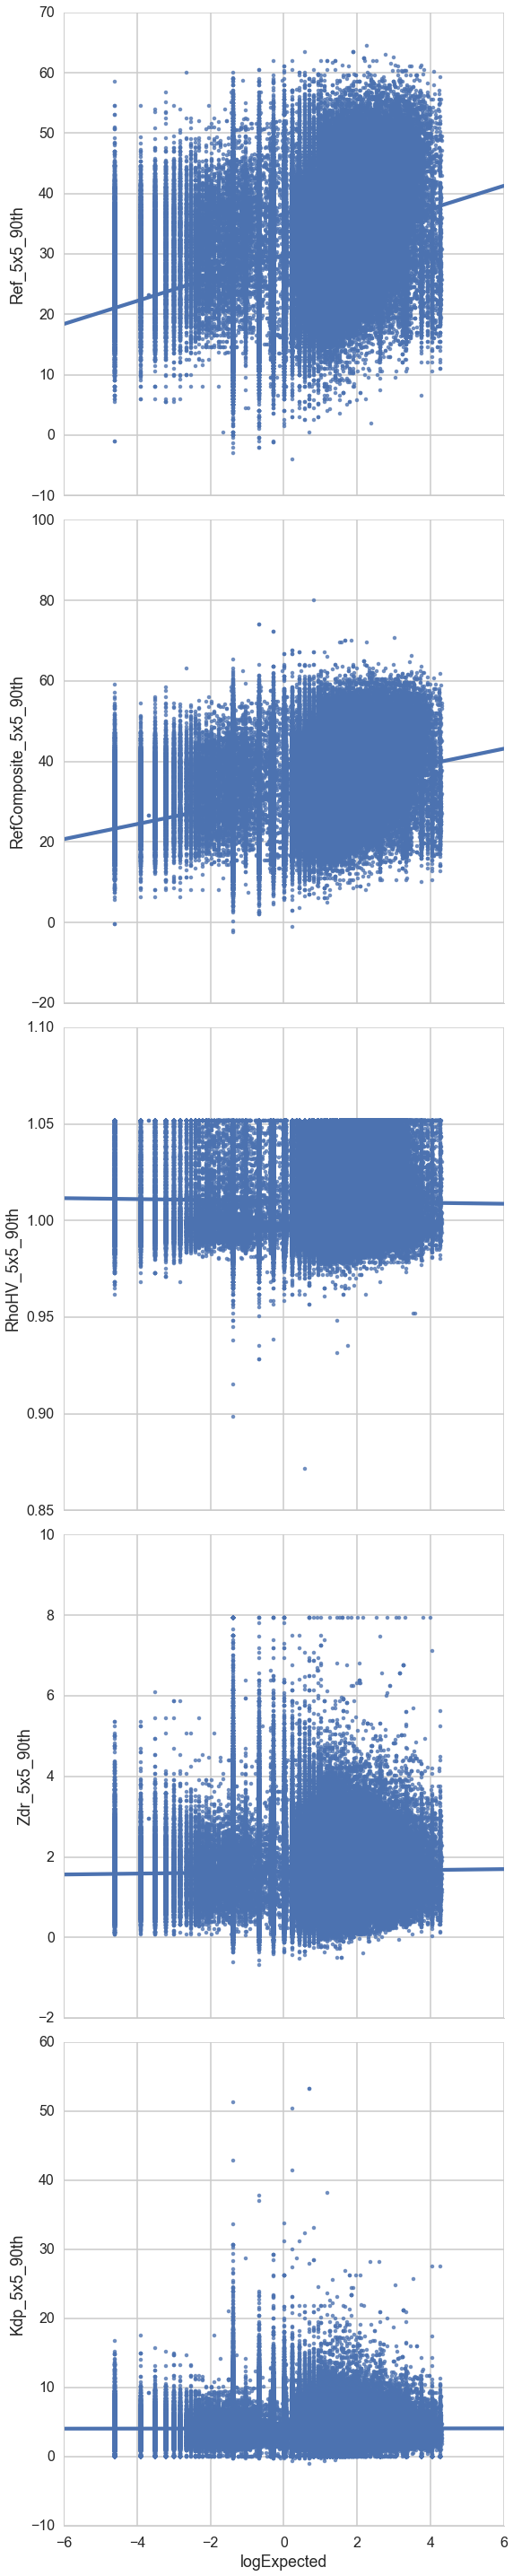

In [8]:
# Exploratory Data Analysis

sns.pairplot(groupedset, kind='reg', x_vars=['logExpected'], y_vars=['Ref', 'RefComposite', 'RhoHV', 'Zdr', 'Kdp'], size=8)
sns.pairplot(groupedset, kind='reg', x_vars=['logExpected'], y_vars=['Ref_5x5_90th', 'RefComposite_5x5_90th', 'RhoHV_5x5_90th', 'Zdr_5x5_90th', 'Kdp_5x5_90th'], size=8)

In [5]:
def measure_increase(ref_series, normalize=False):
    previous = 0
    total = 0
    for ref in ref_series:
        difference = ref - previous
        if difference > 0:
            total += difference
        previous = ref
    if normalize:
        total = total / len(ref_series)
    return total

In [8]:
ref_increase_set = groupset.aggregate({'Ref': measure_increase, 'Expected': np.mean})

In [9]:
ref_increase_set.head()

,Expected,Ref
Id,,
2,1.016000,49.5
10,0.010000,51.0
11,2.540001,27.0
12,3.302002,42.0
14,1.270001,24.0


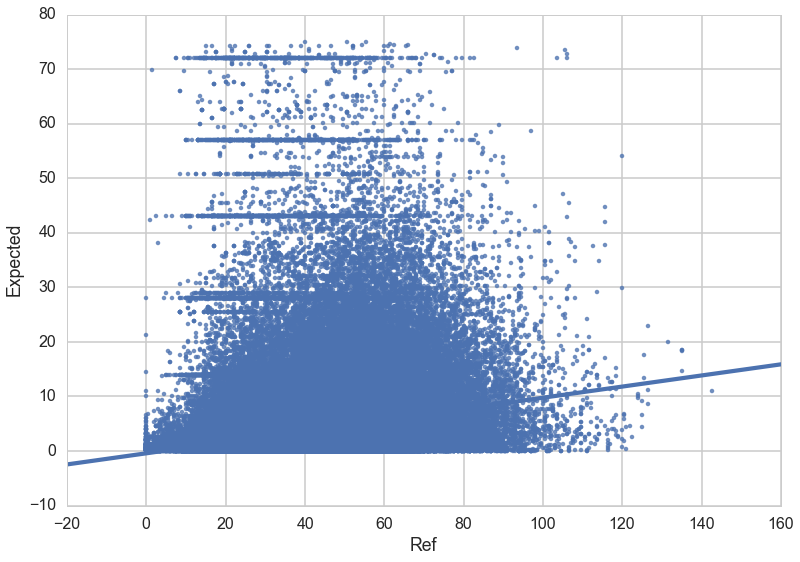

In [10]:
sns.regplot('Ref', 'Expected', data=ref_increase_set)

In [11]:
ref_increase_set['Exp2'] = ref_increase_set.Expected**2
ref_increase_set['Exp0.5'] = ref_increase_set.Expected**(0.5)

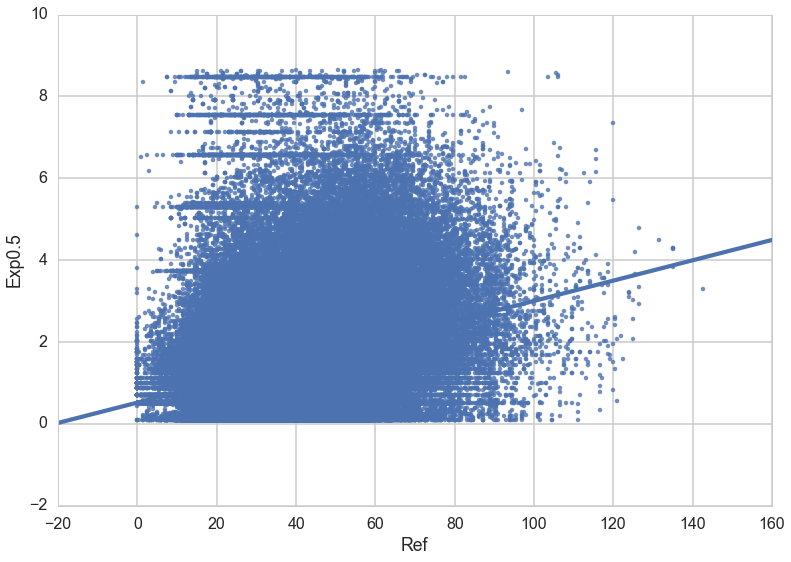

In [12]:
sns.regplot('Ref', 'Exp0.5', data=ref_increase_set)

In [7]:
ref_increase_set_norm = groupset.aggregate({'Ref': lambda ref: measure_increase(ref, normalize=True), 'Expected': np.mean})
ref_increase_set_norm.head()

,Expected,Ref
Id,,
2,1.016000,5.500000
10,0.010000,4.250000
11,2.540001,3.857143
12,3.302002,4.200000
14,1.270001,8.000000


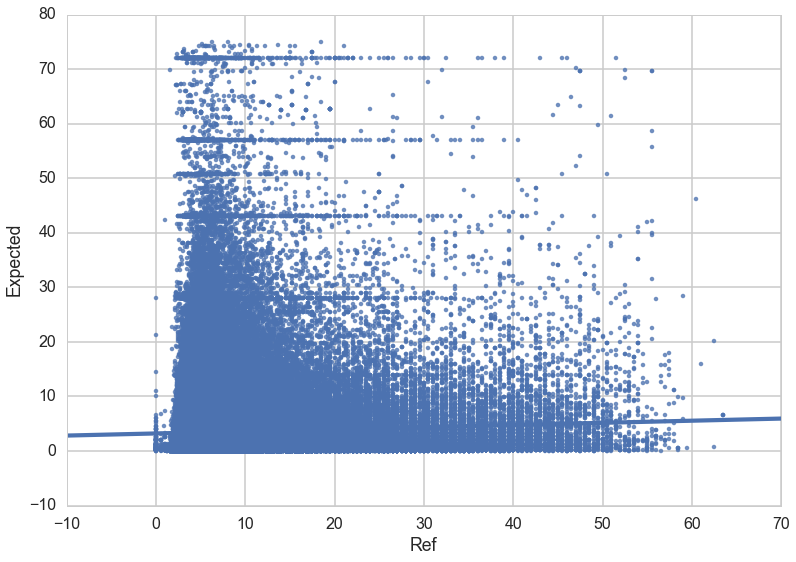

In [16]:
sns.regplot('Ref', 'Expected', data=ref_increase_set_norm)

In [8]:
ref_increase_set_norm['LogExp'] = np.log(ref_increase_set_norm.Expected)
ref_increase_set_norm['LogRef'] = np.log(ref_increase_set_norm.Ref)
ref_increase_set_norm.head()

,Expected,Ref,LogExp,LogRef
Id,,,,
2,1.016000,5.500000,0.015874,1.704748
10,0.010000,4.250000,-4.605170,1.446919
11,2.540001,3.857143,0.932165,1.349927
12,3.302002,4.200000,1.194529,1.435085
14,1.270001,8.000000,0.239017,2.079442


In [10]:
ref_increase_set_norm.to_csv('../../Desktop/out.csv', mode='w+')

In [ ]:
sns.regplot('LogRef', 'LogExp', data=ref_increase_set_norm)

In [15]:
ref_max_set = groupset.aggregate({'Ref': np.amax, 'Expected': np.mean})
ref_max_set.head()

,Expected,Ref
Id,,
2,1.016000,24.5
10,0.010000,38.0
11,2.540001,23.5
12,3.302002,35.5
14,1.270001,24.0


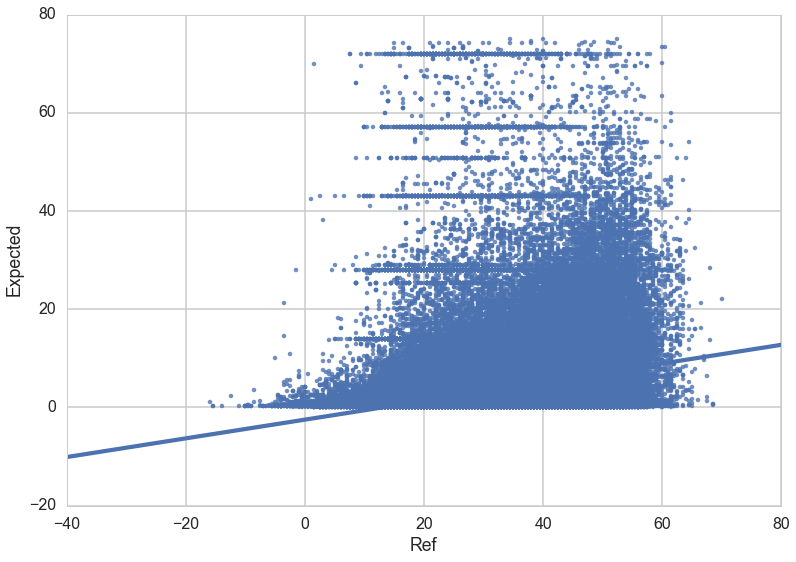

In [17]:
sns.regplot('Ref', 'Expected', data=ref_max_set)